In [1]:
from storage_utils import load_logbook, load_strategy, load_summary, load_logbook_df, load_strategy_df, set_storage_dir_path_exact
import storage_utils

In [2]:
set_storage_dir_path_exact('./remote_results/sigma10000_2024-05-13_00-34-16-900634')
print(storage_utils.STORAGE_DIR_PATH)

./remote_results/sigma10000_2024-05-13_00-34-16-900634


In [3]:
DUMP_DIR_PATH = './remote_results/sigma1000_2024-05-13_00-33-35-253752/cmaes_2024-05-13_02-28-48-234969'
DATASET = "./data/wig_d.csv"
UNKNOWN_DATASET = "./data/wig_d_unknown.csv"
INITIAL_MONEY = 1000
COMMISSION = 0

In [4]:
load_strategy_df(DUMP_DIR_PATH)

feature  buy strategy weight  sell strategy weight
0            volume_adi        -10165.462493          32606.825273
1            volume_obv        -99036.495078         -52404.244177
2            volume_cmf        120834.916211         139378.052396
3             volume_fi         84886.982593          18206.397947
4             volume_em         64956.187186          26488.513679
..                  ...                  ...                   ...
72  momentum_pvo_signal         35920.565471         -82366.393542
73    momentum_pvo_hist        -99321.951139          55211.106333
74        momentum_kama        -74883.656264         -55725.615506
75            others_dr         43966.102760          84916.885433
76            others_cr        -39985.882986          96528.383273

[77 rows x 3 columns]

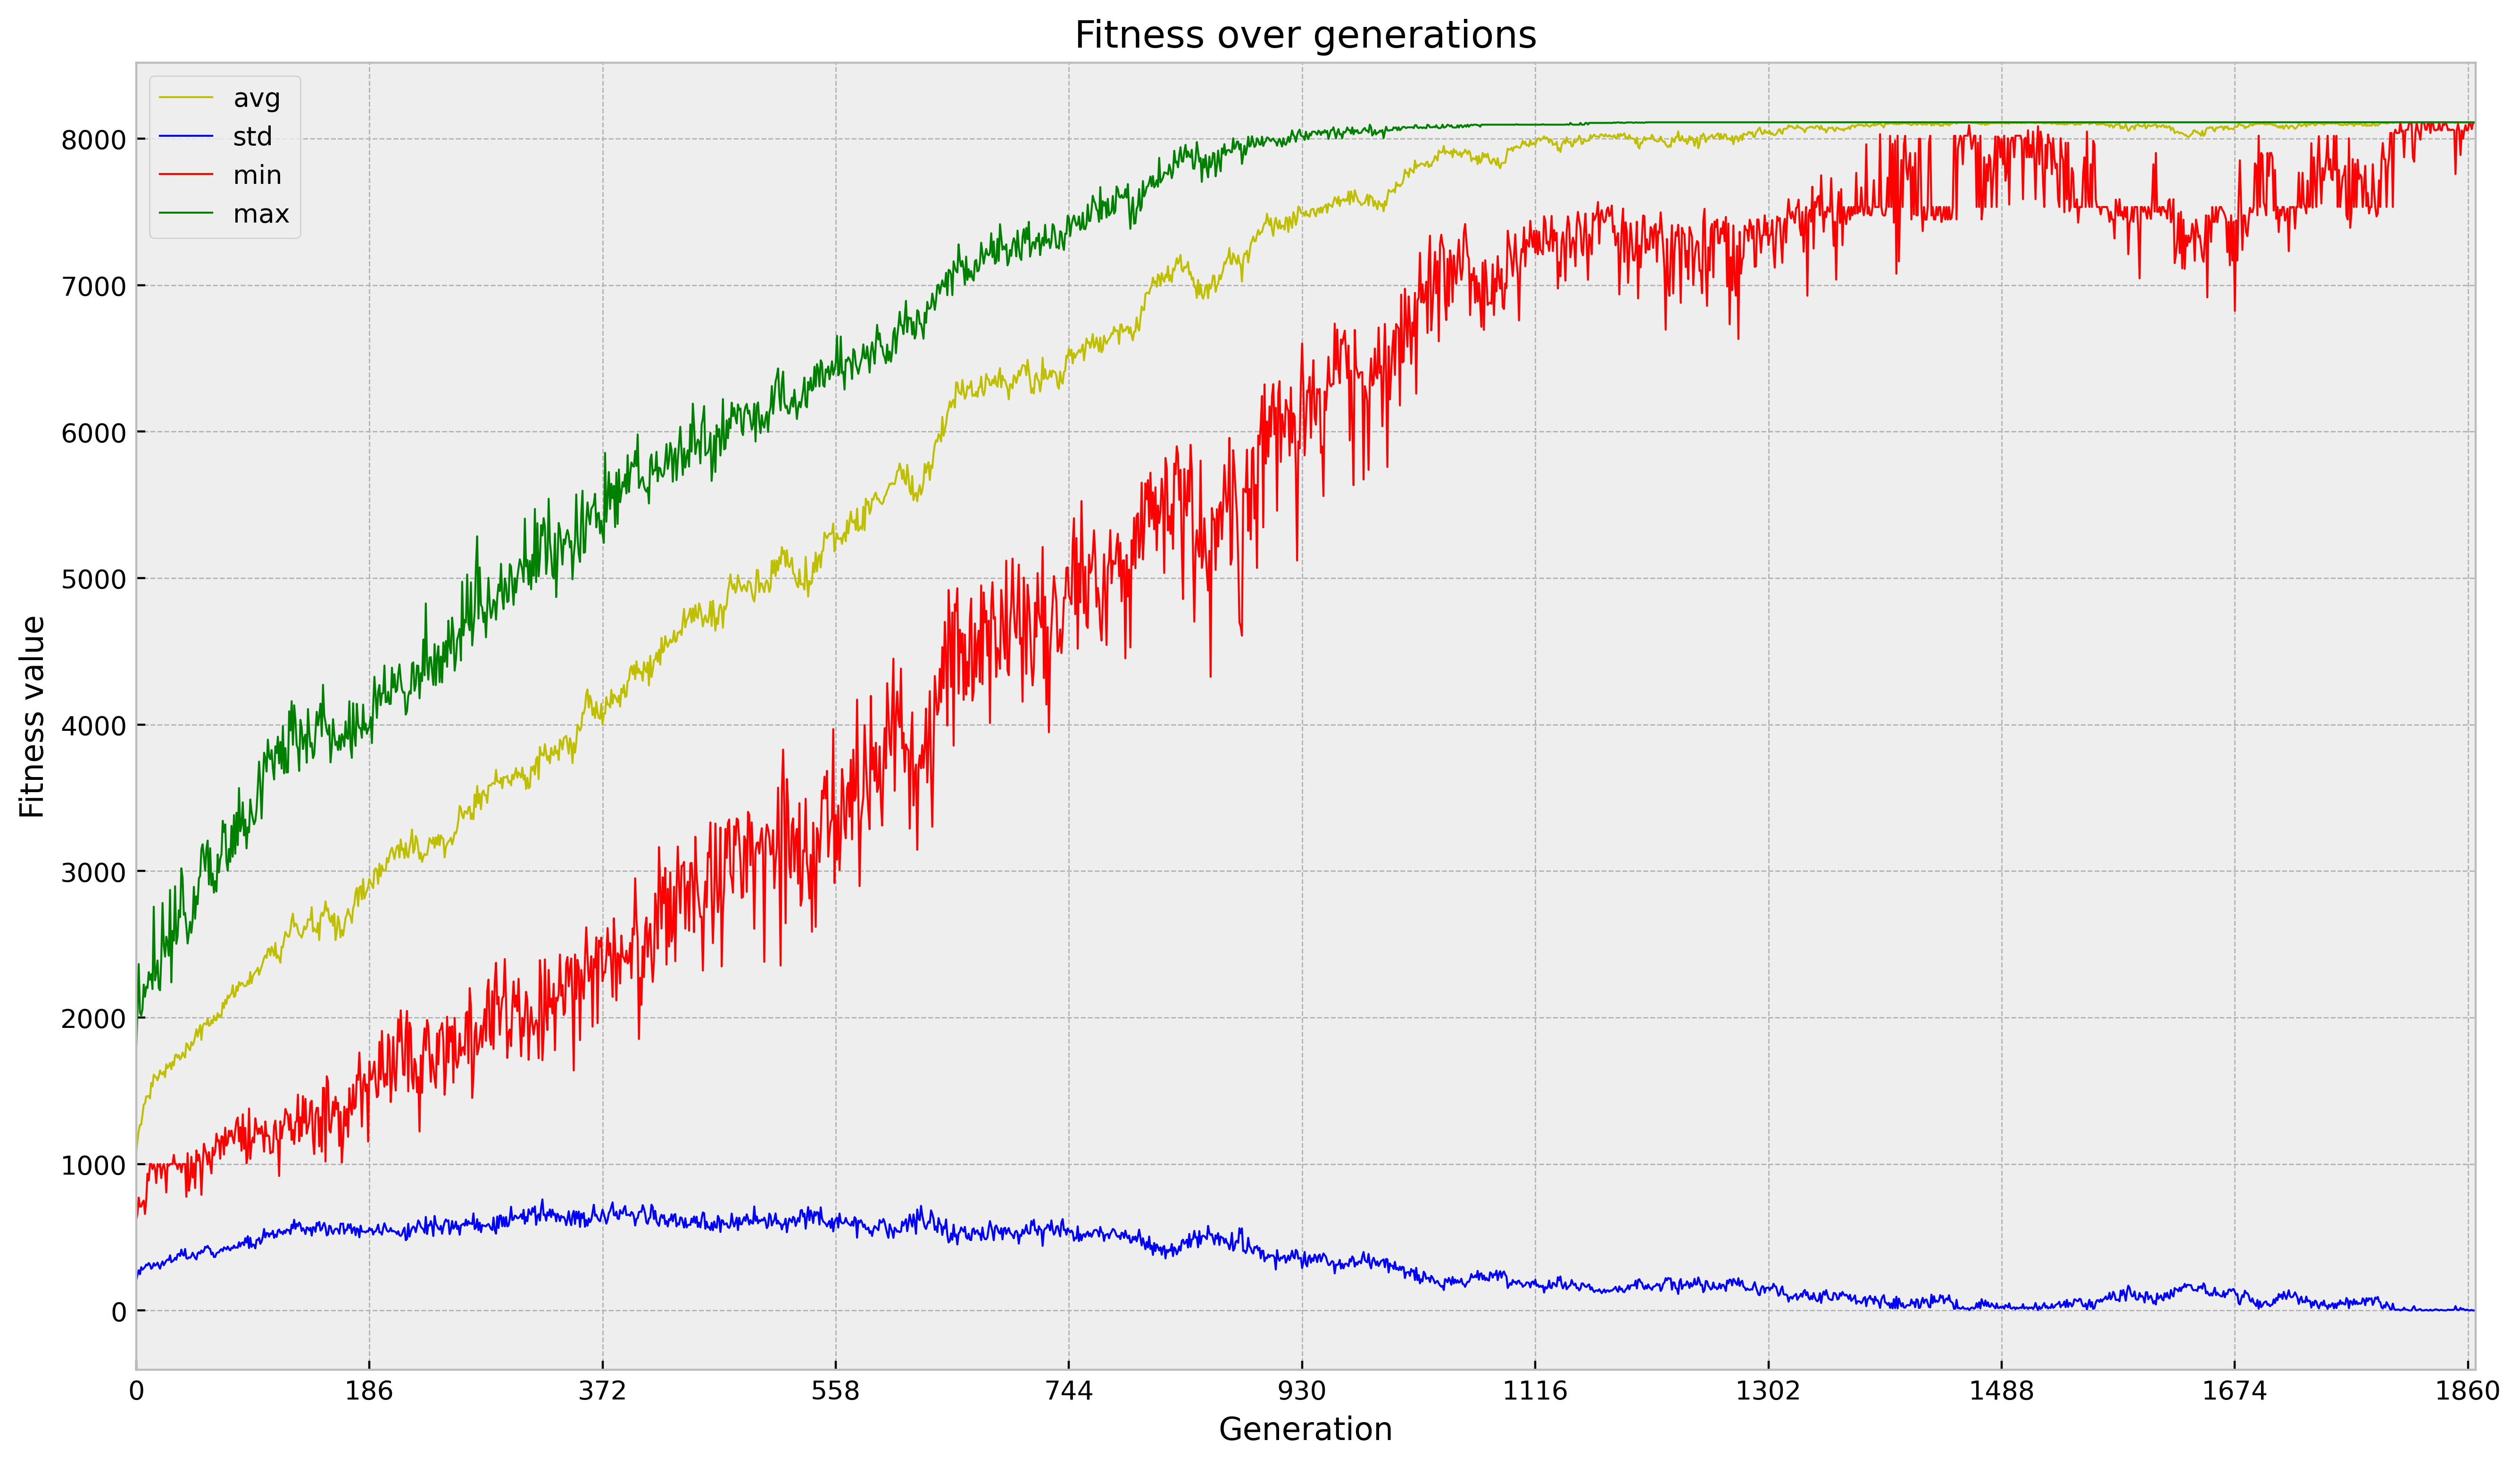

In [5]:
from strategy_visualizer import plot_fitness_over_generations

logbook = load_logbook(DUMP_DIR_PATH)
plot_fitness_over_generations(logbook)

In [6]:
from preprocessing import preprocess_data
from strategy_visualizer import plot_strategy, simulate_strategy

def simulate_and_plot(dataset):
    strategy = load_strategy(DUMP_DIR_PATH)
    stock_data, ta_features, _ = preprocess_data(dataset)
    
    dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_strategy(
        stock_data,
        ta_features,
        strategy,
        INITIAL_MONEY,
        COMMISSION,
    )
    plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)

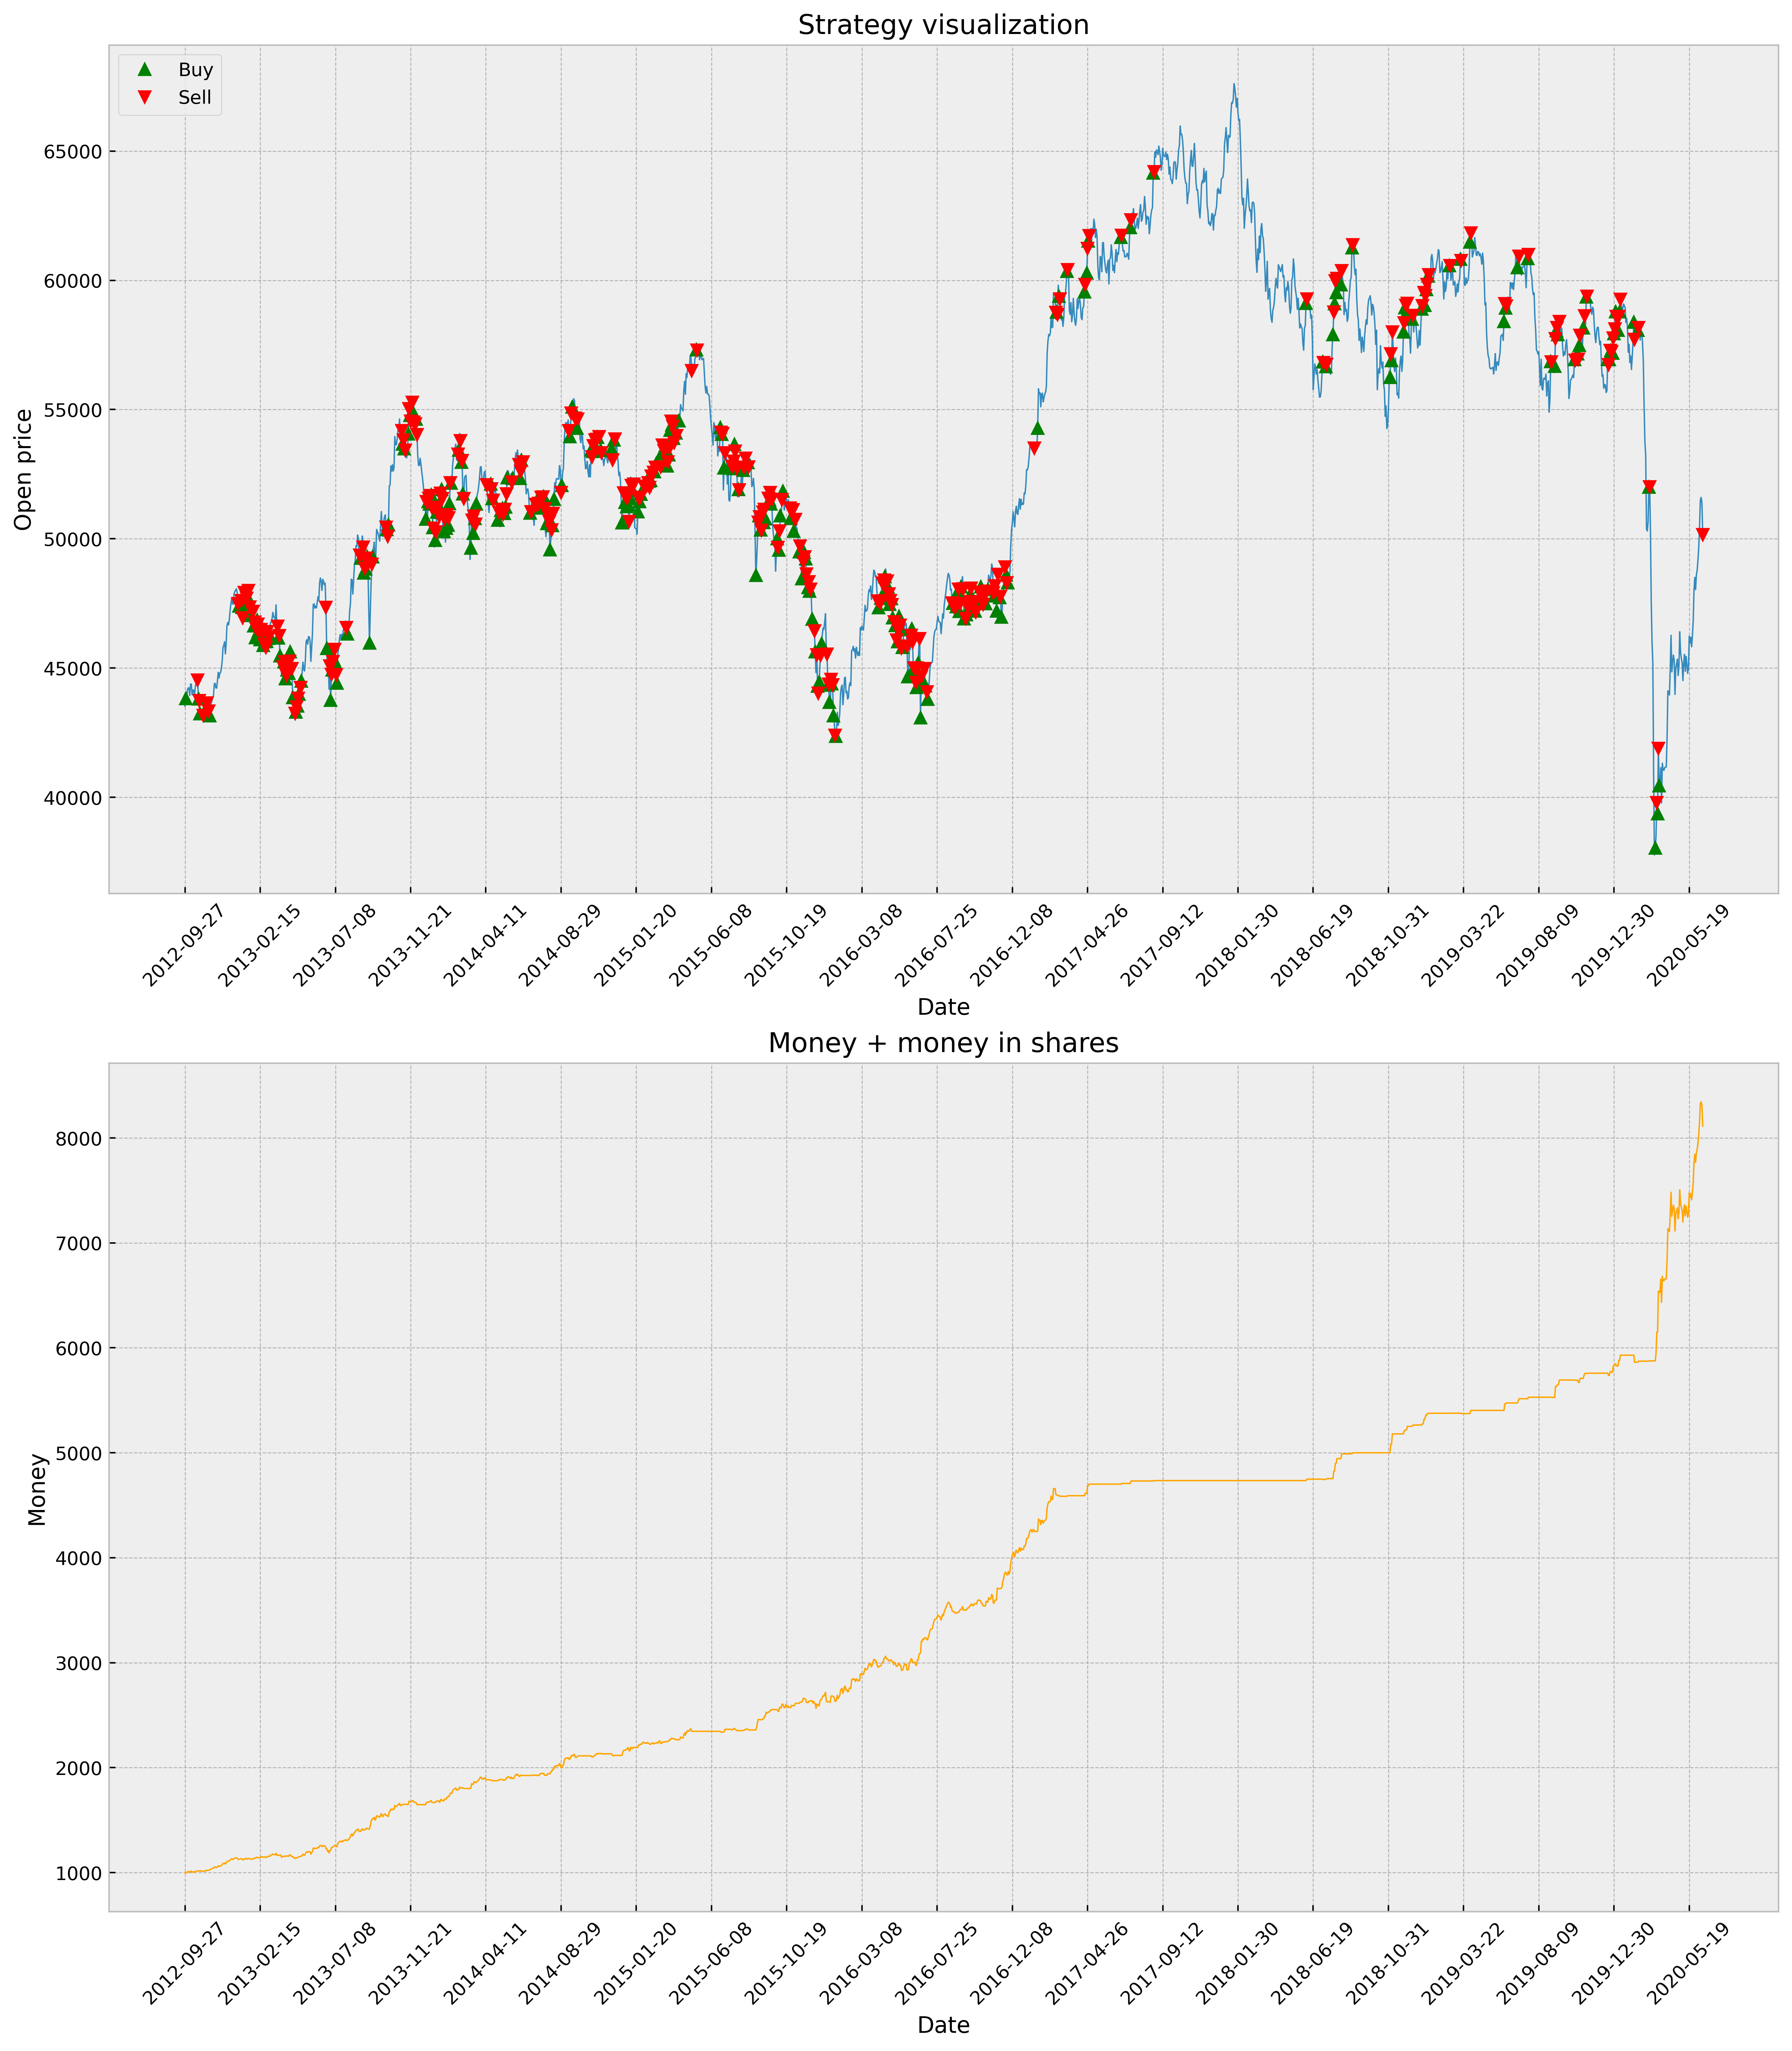

In [7]:
simulate_and_plot(DATASET)

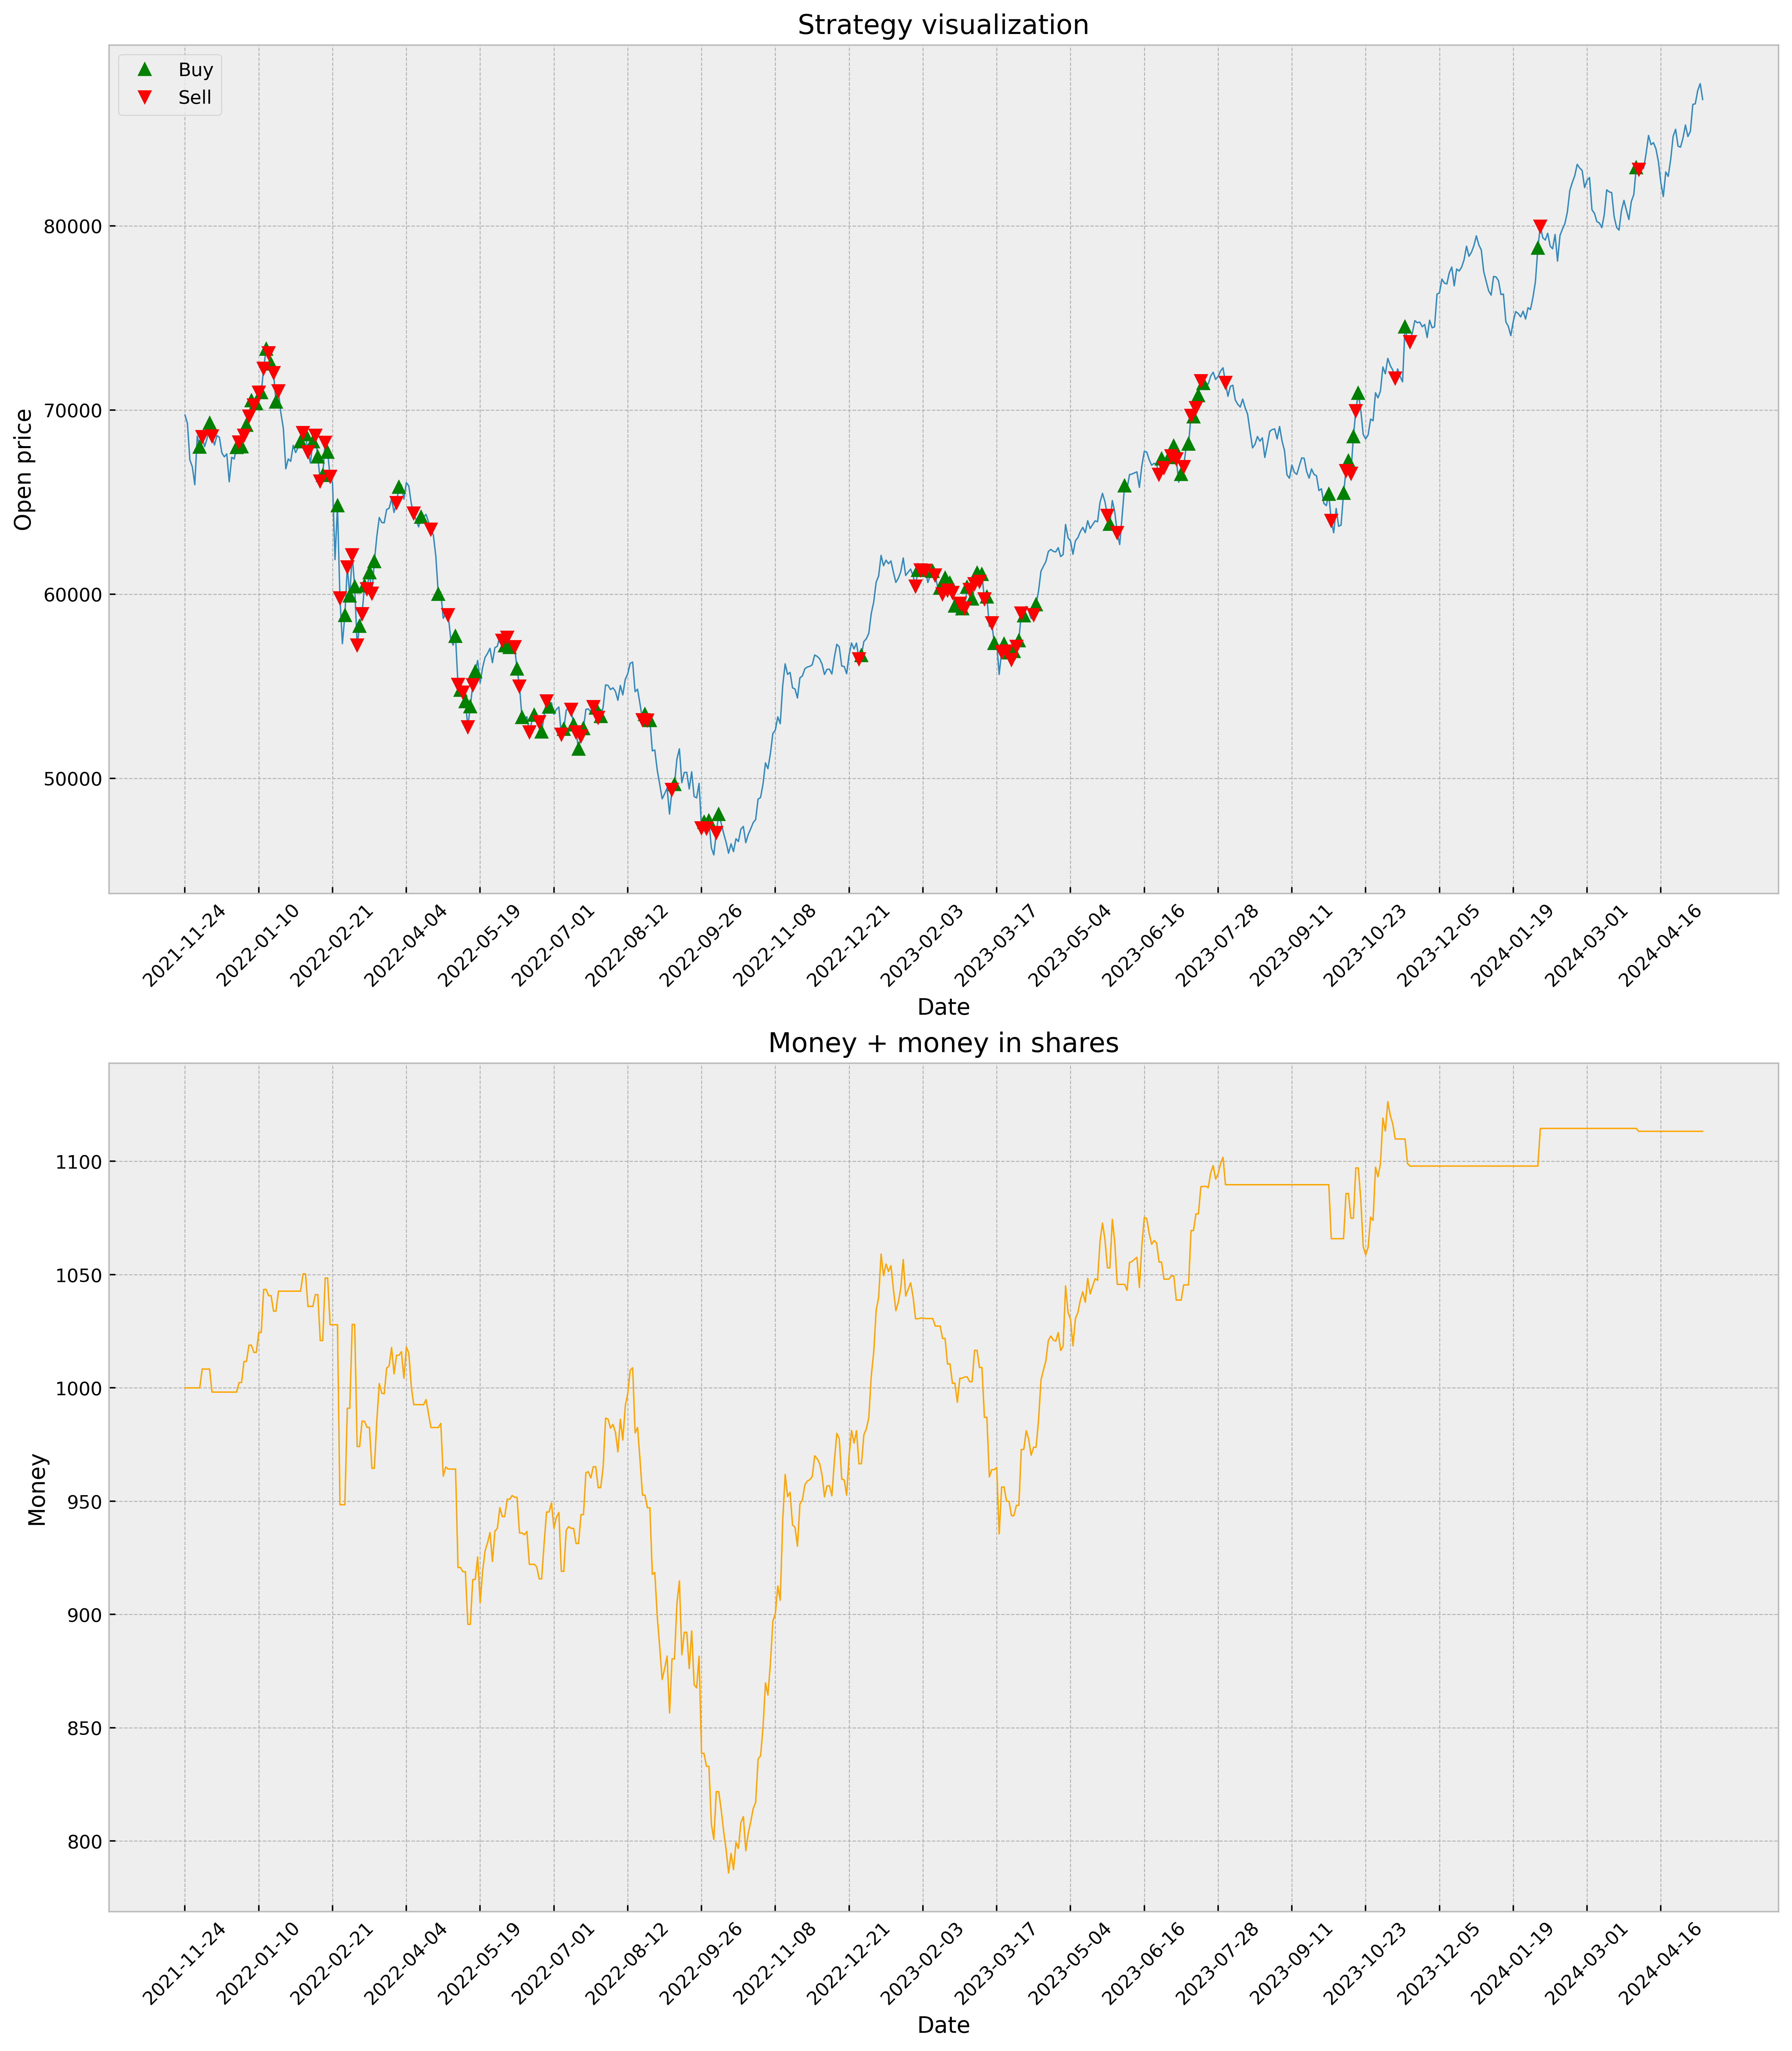

In [8]:
simulate_and_plot(UNKNOWN_DATASET)